### Projeto de ciência de dados: Desmatamento na Amazônia 

### Índice 

1. Introdução.
2. Importação de bibliotecas e dados.
3. Exploração inicial dos dados.
4. Limpeza dos dados.
5. Analise do desmatamento por ano.
6. visualização grafica.
7. Conclusões.

### Introdução

Este projeto tem como objetivo analisar os dados de desmatamento da Amazônia ao longo dos anos.
A análise permite identificar tendências, picos de desmatamento e fornecer insights sobre o avanço da degradação florestal.

In [66]:
## Importação de bibliotecas e dados

import pandas as pd

In [67]:
### Caminho do arquivo CSV

df = pd.read_csv(r'C:\Users\Atanasio\Documents\projeto_amazonia\dados\archive\data.csv')

In [68]:
df.head()

,ano,id_municipio,area,desmatado,incremento,floresta,nuvem,nao_observado,nao_floresta,hidrografia
0,2000,1100015,7137,1761.1,NaN,3639.6,0.0,6.1,1708.0,22.2
1,2000,1100023,4481,2661.2,NaN,1730.0,0.0,0.0,89.6,0.2
2,2000,1100031,1322,851.2,NaN,455.2,0.0,0.6,11.3,3.7
3,2000,1100049,3821,2311.3,NaN,1477.7,0.0,0.0,26.2,5.8
4,2000,1100056,2805,731.3,NaN,829.3,0.0,0.0,1244.4,0.0


In [69]:
### Informações gerais do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16720 entries, 0 to 16719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ano            16720 non-null  int64  
 1   id_municipio   16720 non-null  int64  
 2   area           16720 non-null  int64  
 3   desmatado      16720 non-null  float64
 4   incremento     15960 non-null  float64
 5   floresta       16720 non-null  float64
 6   nuvem          16720 non-null  float64
 7   nao_observado  16720 non-null  float64
 8   nao_floresta   16720 non-null  float64
 9   hidrografia    16720 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.3 MB


In [70]:
### Estatísticas descritivas

df.describe()

,ano,id_municipio,area,desmatado,incremento,floresta,nuvem,nao_observado,nao_floresta,hidrografia
count,16720.000000,1.672000e+04,16720.000000,16720.000000,15960.000000,16720.000000,16720.000000,16720.000000,16720.000000,16720.000000
mean,2010.500000,2.292061e+06,6668.484211,954.653834,18.371172,3980.076304,303.187249,95.782614,1264.546304,148.586998
std,6.344479,1.375414e+06,13857.511878,1374.296395,67.631285,11954.043960,1888.025470,562.813003,2401.909519,430.376364
min,2000.000000,1.100015e+06,64.000000,0.000000,0.000000,0.000000,0.000000,-379.600000,0.000000,0.000000
25%,2005.000000,1.502744e+06,891.750000,120.300000,0.000000,19.000000,0.000000,0.000000,4.600000,0.000000
50%,2010.500000,1.712430e+06,2379.500000,450.400000,1.200000,222.650000,0.000000,0.000000,195.850000,4.350000
75%,2016.000000,2.109214e+06,6422.000000,1258.325000,9.400000,2295.425000,5.100000,1.200000,1436.725000,65.025000
max,2021.000000,5.108956e+06,159540.000000,20471.500000,1808.600000,152013.600000,68394.900000,11321.100000,19780.800000,4499.900000


In [71]:
### Agrupando por ano e somando área desmatada.

desmatamento_ano = (
     df.groupby('ano')['desmatado']
    .sum()
    .reset_index()
)
desmatamento_ano.head()

,ano,desmatado
0,2000,532920.5
1,2001,587431.6
2,2002,613144.6
3,2003,643523.7
4,2004,670690.2


In [72]:
import matplotlib.pyplot as plt

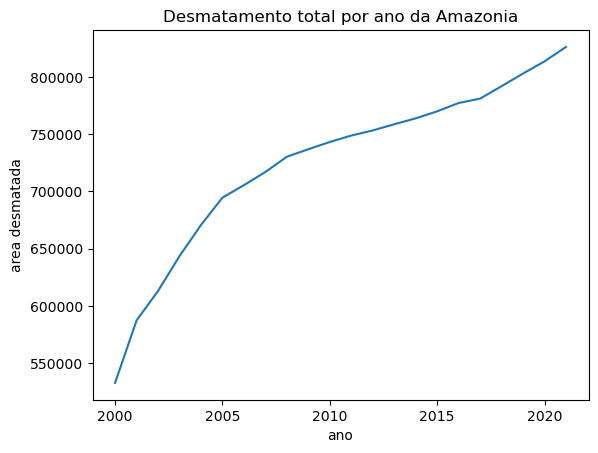

In [73]:
### Gerando grafico Desmatamento total por ano na Amazônia.

plt.figure()
plt.plot(desmatamento_ano['ano'], desmatamento_ano['desmatado'])
plt.xlabel('ano')
plt.ylabel('area desmatada')
plt.title('Desmatamento total por ano da Amazonia')
plt.show()

In [74]:
print(df.isnull().sum())

ano                0
id_municipio       0
area               0
desmatado          0
incremento       760
floresta           0
nuvem              0
nao_observado      0
nao_floresta       0
hidrografia        0
dtype: int64


In [75]:
### Substituido valores por 0

df_limpo = df.fillna(0)

In [76]:
### Conferindo

print(df_limpo.isnull().sum().sum())

0


In [77]:
### Agrupando por id_municipio e somando área  desmatada.

ranking_municipios = (
    df_limpo.groupby('id_municipio')['desmatado']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
print(ranking_municipios.head(10))

   id_municipio  desmatado
0       1507300   345705.4
1       1505502   184012.6
2       1504208   174288.8
3       1100205   173507.0
4       5105101   165044.1
5       1500602   147797.0
6       1506708   146956.0
7       1502764   145739.8
8       1505064   143830.5
9       2110005   124449.4


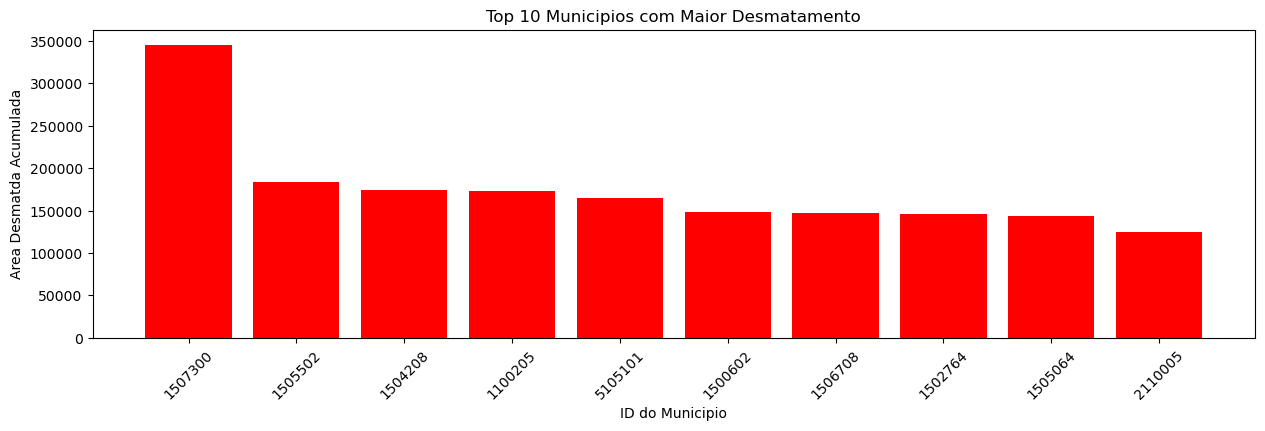

In [78]:
### Gerando graficos com valores municipio e desmatamento.

top_10 = ranking_municipios.head(10)

plt.figure(figsize=(15,4))
plt.bar(top_10['id_municipio'].astype(str), top_10['desmatado'], color='red')
plt.xlabel('ID do Municipio')
plt.ylabel('Area Desmatda Acumulada')
plt.title('Top 10 Municipios com Maior Desmatamento')
plt.xticks(rotation=45)
plt.show()

In [79]:
df_limpo['percentual_desmatado'] = (df_limpo['desmatado'] / df_limpo['area']) * 100

df_limpo[['id_municipio', 'ano', 'percentual_desmatado']].sort_values(by='percentual_desmatado', ascending=False).head(10)

,id_municipio,ano,percentual_desmatado
9651,2105948,2013,100.408163
3571,2105948,2001,100.408163
10411,2105948,2012,100.408163
15731,2105948,2019,100.408163
14211,2105948,2021,100.408163
4331,2105948,2007,100.408163
12691,2105948,2015,100.408163
11931,2105948,2016,100.408163
2051,2105948,2005,100.408163
5851,2105948,2008,100.408163


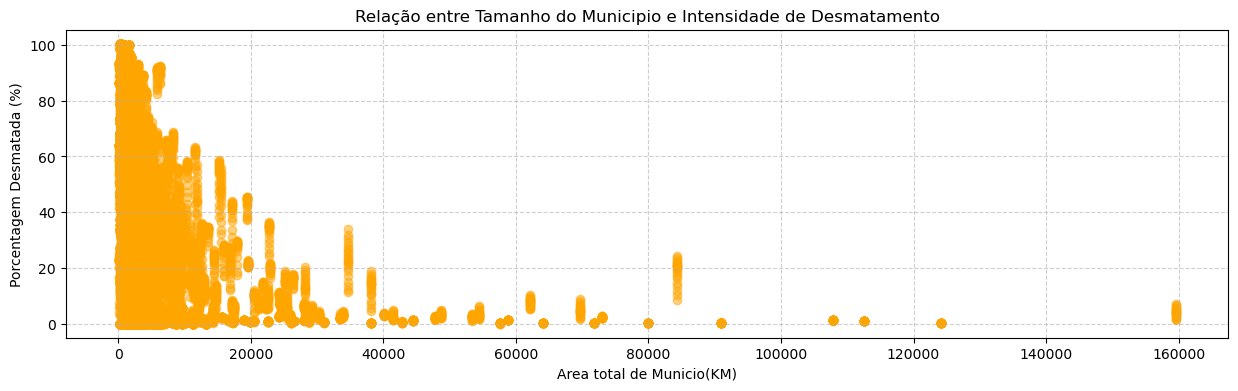

In [80]:
### Criando grafico de pontos

plt.figure(figsize=(15,4))

plt.scatter(df_limpo['area'], df_limpo['percentual_desmatado'], alpha=0.5, color='orange')

plt.xlabel('Area total de Municio(KM)')
plt.ylabel('Porcentagem Desmatada (%)')
plt.title('Relação entre Tamanho do Municipio e Intensidade de Desmatamento')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [81]:
### Vamos Salvar o dataframe final( com as novas colunas)

caminho_salvar = r'C:\Users\Atanasio\Documents\projeto_amazonia\dados\archive\resultado_projeto_amazonia.csv'

df_limpo.to_csv(caminho_salvar, index=False)


print(f"Sucesso! O arquivo foi salvo") 

Sucesso! O arquivo foi salvo
